In [13]:
import sys
sys.path.append('/root/data/MD2025/histwords')
sys.path.append('..')
# 把我们的“工具箱”加入系统路径，让import时可以找到对应类

# 导入我们即将使用的两个核心类
from histwords.representations.embedding import Embedding
from histwords.representations.sequentialembedding import SequentialEmbedding

# 设置Numpy打印选项，增强可读性
import numpy as np
np.set_printoptions(legacy='1.21')

#设置语料库路径
path_eng = '../eng-all/sgns'
path_fre = '../fre-all/sgns'

# 设置语料库时间范围并加载历时模型
decades = range(1800,1990,10)
seq_embedding_eng = SequentialEmbedding.load(path_eng,decades)
seq_embedding_fre = SequentialEmbedding.load(path_fre,decades)

In [14]:


#设置反义词轴（英语）['positive','rational','promote','elegant','classical'] ['negative','impulsive','restrain','ugly','modern']
positive_word_eng = ['good','great','well','nice','fine','excellent','useful']
negative_word_eng = ['bad','poor','terrible','awful','horrible']

#设置反义词轴（法语）
positive_word_fre = ['positif','rationnel','promouvoir','élégant','classique']
negative_word_fre = ['négatif','impulsion','freiner','laid','moderne']

#投影计算legalization democracy Germany education nationalism feminism technology industrial
dictionary_eng1=['education','teacher','score','student','exam','activity','school','group','study']
dictionary_eng2=['technology','machine','electricity','environment','factory']
dictionary_fre1=['éducation','professeur','note','étudiant','étudiante','élève','examen','activité','école','groupe','étude','étudier']
dictionary_fre2=['technologie','machine','électricité','environnement','usine']

results1 = []
for i1 in dictionary_eng1 :
    result_eng1 = seq_embedding_eng.get_projection_by_year(positive_word_eng,negative_word_eng,i1)
    results1.append(result_eng1)
    print(result_eng1)

results2=[]
for i2 in dictionary_eng2 :
    result_eng2 = seq_embedding_eng.get_projection_by_year(positive_word_eng,negative_word_eng,i2)
    results2.append(result_eng2)
    print(result_eng2)

results3=[]
for j1 in dictionary_fre1 :
     result_fre1 = seq_embedding_fre.get_projection_by_year(positive_word_fre,negative_word_fre,j1)
     results3.append(result_fre1)
     print(result_fre1)

results4=[]
for j2 in dictionary_fre2 :
    result_fre2 = seq_embedding_fre.get_projection_by_year(positive_word_fre,negative_word_fre,j2)
    results4.append(result_fre2)
    print(result_fre2)




{1800: 0.14200203302110073, 1810: 0.12927387761236772, 1820: 0.17509663923437954, 1830: 0.14167937914335987, 1840: 0.1578779934855885, 1850: 0.17578059156203873, 1860: 0.189083737312191, 1870: 0.1728517967318261, 1880: 0.20234612870495972, 1890: 0.16261451344124736, 1900: 0.1717355888632122, 1910: 0.14702531731285323, 1920: 0.13695928802158572, 1930: 0.2065539265757127, 1940: 0.23328266931686933, 1950: 0.18576229037151956, 1960: 0.14732928993509828, 1970: 0.1648948815697521, 1980: 0.1016710497173228}
{1800: 0.16351431236679073, 1810: 0.18924473259841115, 1820: 0.08091365065643527, 1830: 0.16017773061834173, 1840: 0.17965583096564633, 1850: 0.10795799861389231, 1860: 0.15210620705098404, 1870: 0.1331774195806438, 1880: 0.14833357067693825, 1890: 0.2499131879610904, 1900: 0.24834038056866753, 1910: 0.20029580777846734, 1920: 0.22164587454288195, 1930: 0.2561822034795287, 1940: 0.23858636653330273, 1950: 0.23851377757901218, 1960: 0.22444790547245969, 1970: 0.24245367600063705, 1980: 0.16

/root/data/MD2025/team1/../histwords/representations/sequentialembedding.py:113: RuntimeWarning: invalid value encountered in scalar divide
  projection = np.dot(target_vec, axis_vec) / (


In [15]:
import matplotlib.pyplot

def visualize_ordered_dict(ordered_dict, output_path="visualization.png"):
    """
    Visualize an ordered dictionary as a line plot with markers.
    
    Parameters:
        ordered_dict (OrderedDict): Input ordered dictionary with keys as x-values 
                                  and values as y-values
        output_path (str): Path to save the output image (default: "visualization.png")
    """
    # Extract keys and values from the ordered dictionary
    x = list(ordered_dict.keys())
    y = list(ordered_dict.values())
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o-', color='darkorange', linewidth=2, markersize=8)
    
    # Customize plot
    plt.title('Data Trend Visualization', fontsize=14, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()  # Close plot to free memory


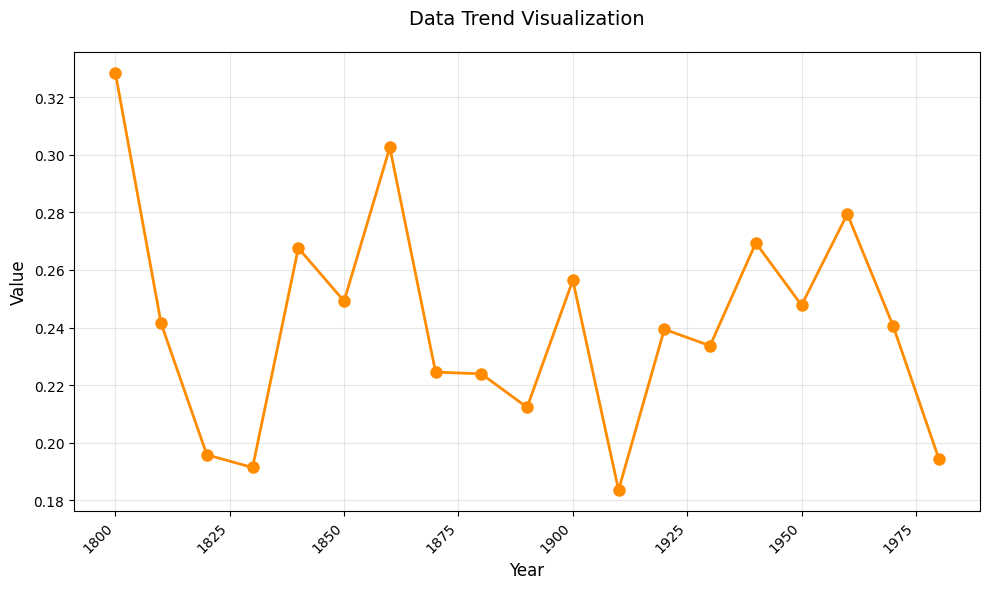

In [16]:
visualize_ordered_dict(result_eng1)

In [17]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np

def plot_multiple_ordered_dicts(dict_list, labels=None, title="Multiple Data Trends", 
                               xlabel="X Values", ylabel="Y Values", output_path="multi_trend_plot.png"):
    """
    Plot multiple OrderedDicts on the same figure.
    
    Parameters:
        dict_list (list): List of OrderedDict objects to plot
        labels (list): Optional list of labels for each dataset (must match length of dict_list)
        title (str): Title of the plot
        xlabel (str): Label for x-axis
        ylabel (str): Label for y-axis
        output_path (str): Path to save the output image
    """
    # Validate input
    if not dict_list:
        raise ValueError("dict_list cannot be empty")
    
    if labels and len(labels) != len(dict_list):
        raise ValueError("Length of labels must match length of dict_list")
    
    # Generate distinct colors (using matplotlib's default color cycle)
    colors = plt.cm.tab10(np.linspace(0, 1, len(dict_list)))
    
    # Create plot
    plt.figure(figsize=(12, 7))
    
    # Plot each OrderedDict
    for i, od in enumerate(dict_list):
        x = list(od.keys())
        y = list(od.values())
        
        # Use custom label if provided, else default to "Dataset X"
        label = labels[i] if labels else f"Dataset {i+1}"
        
        # Plot with unique color and style
        plt.plot(x, y, 'o-', color=colors[i], linewidth=2, markersize=6, label=label)
    
    # Customize plot
    plt.title(title, fontsize=15, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.legend(fontsize=10, loc='best')  # Add legend with labels
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

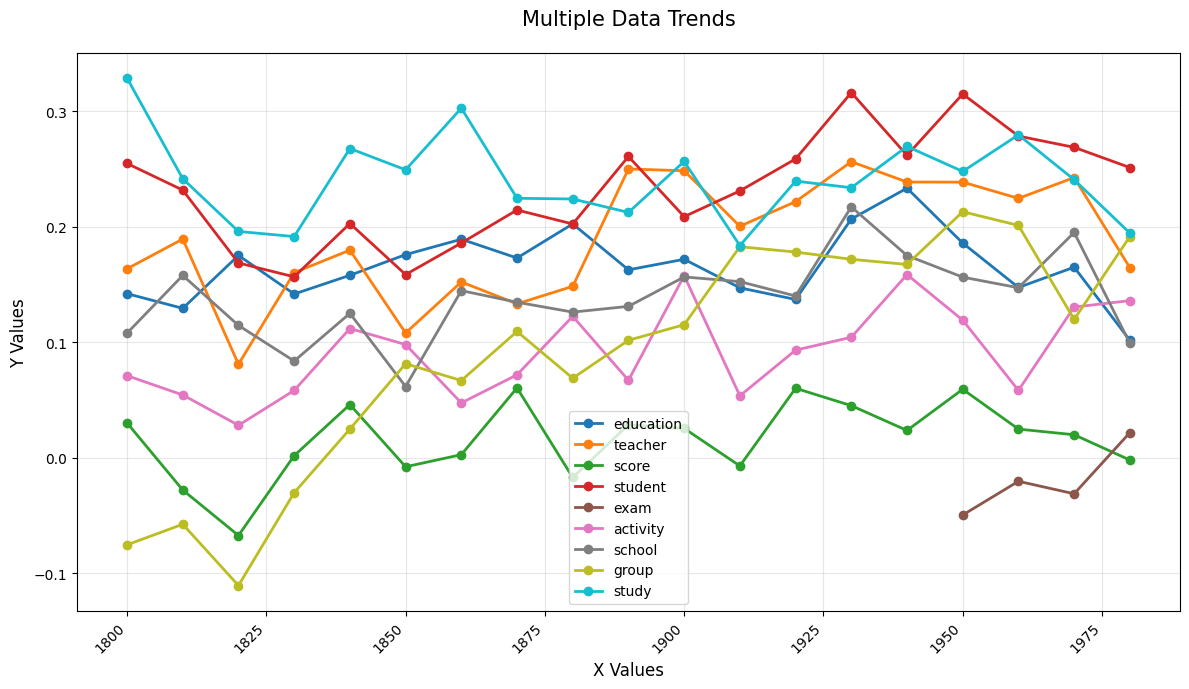

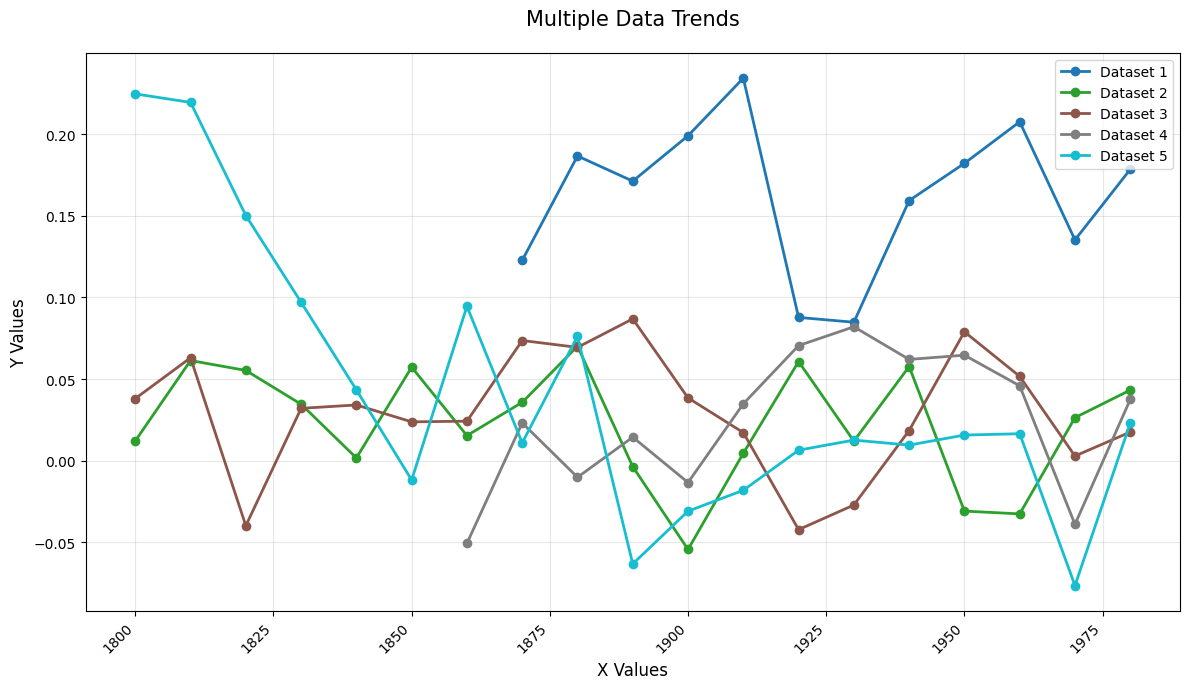

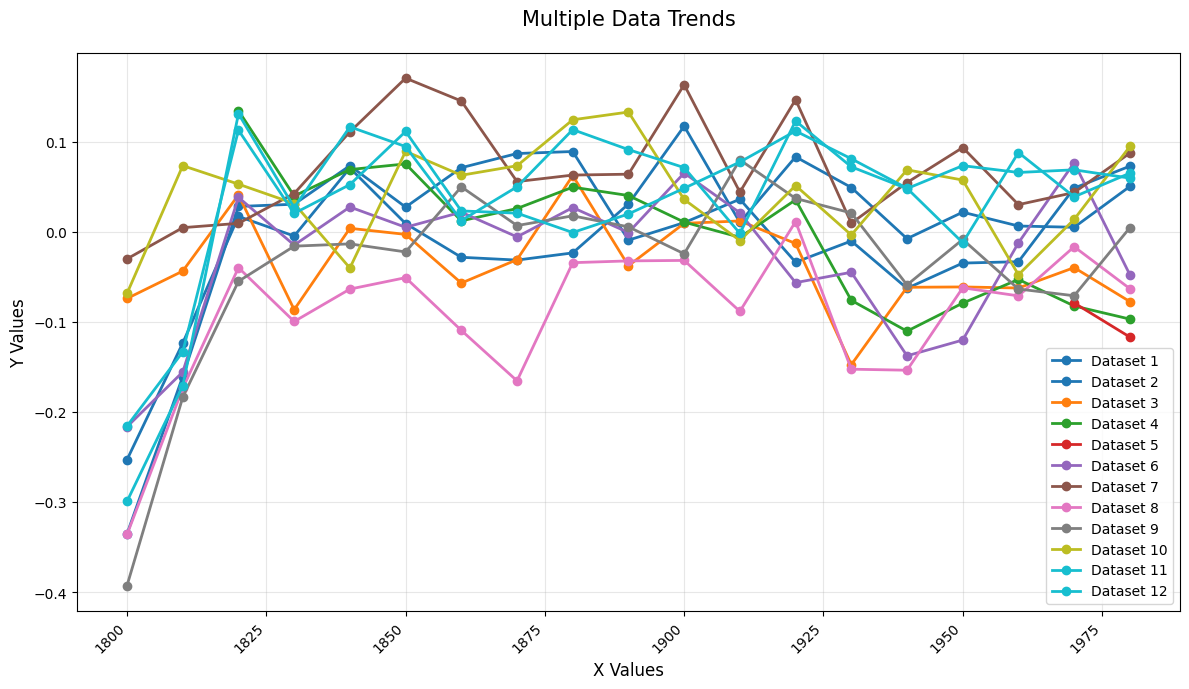

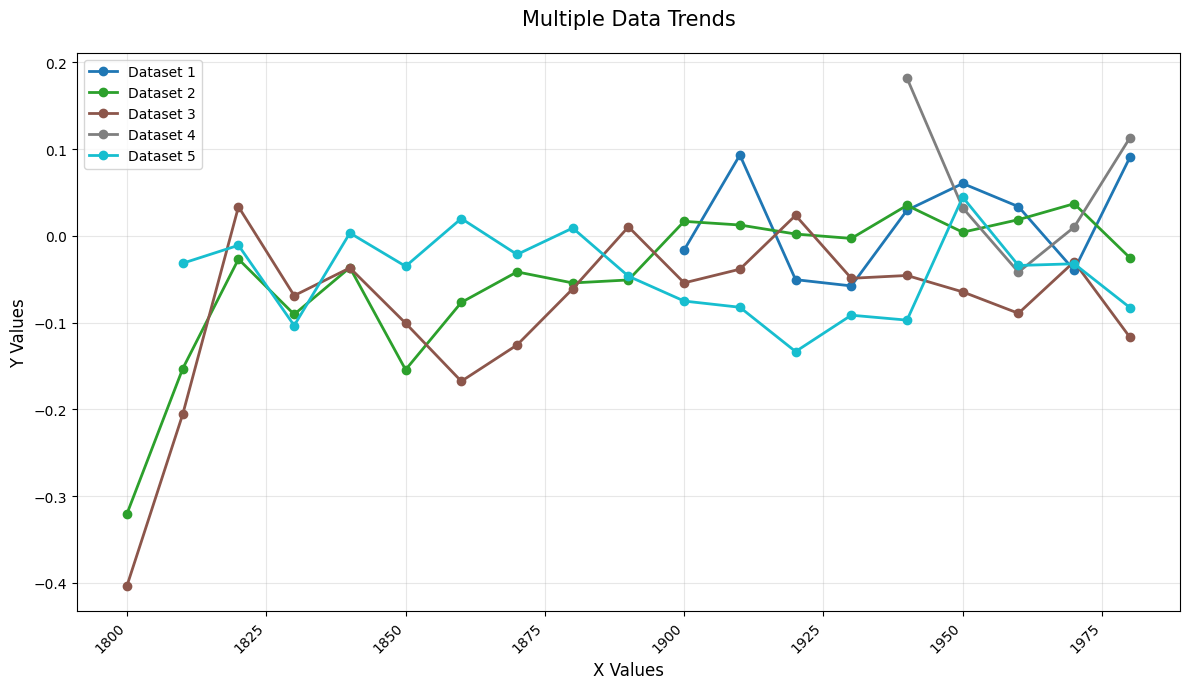

In [18]:


plot_multiple_ordered_dicts(results1,dictionary_eng1,)
plot_multiple_ordered_dicts(results2,)
plot_multiple_ordered_dicts(results3)
plot_multiple_ordered_dicts(results4)

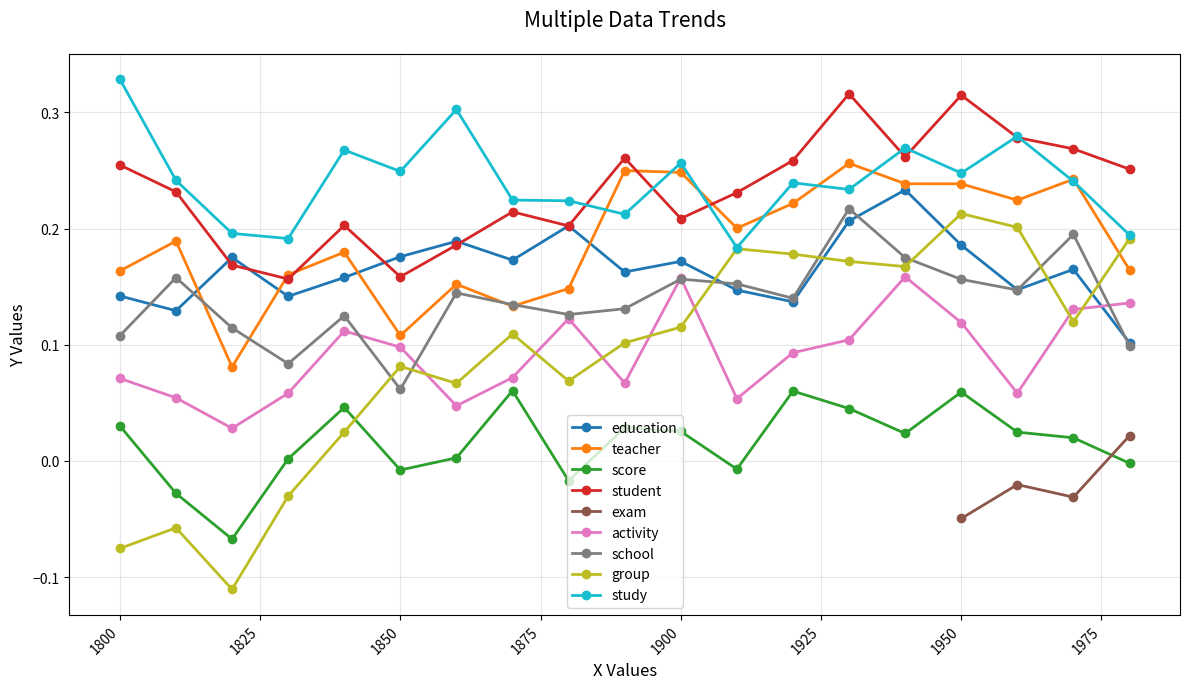

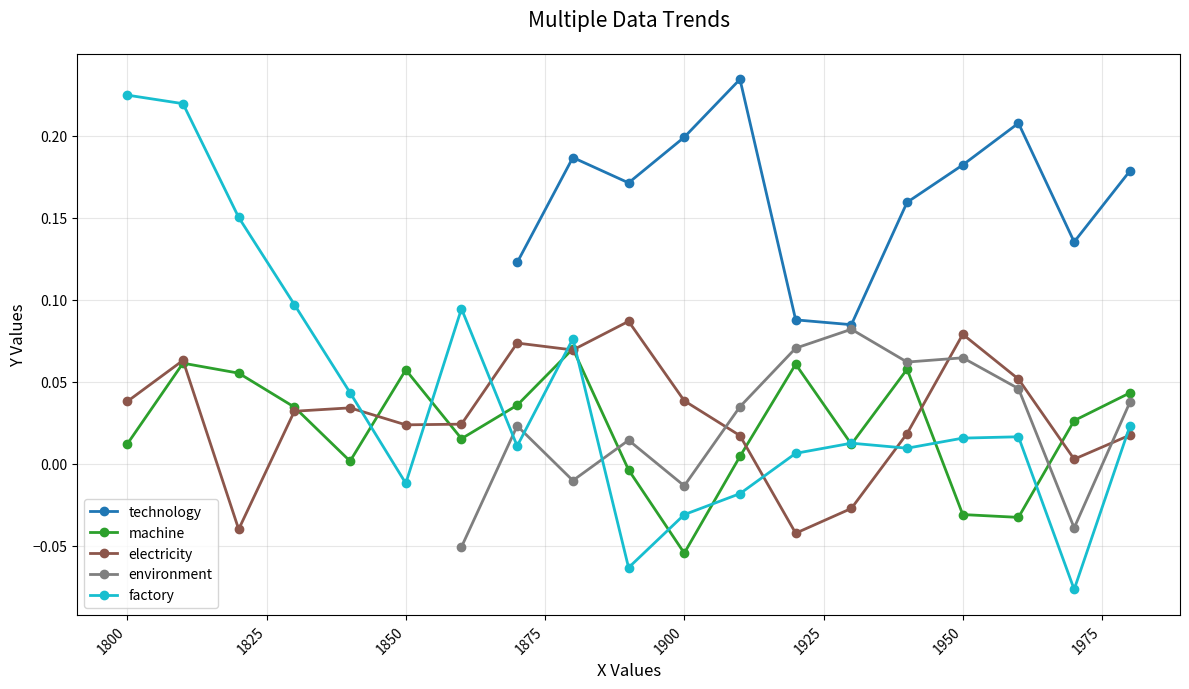

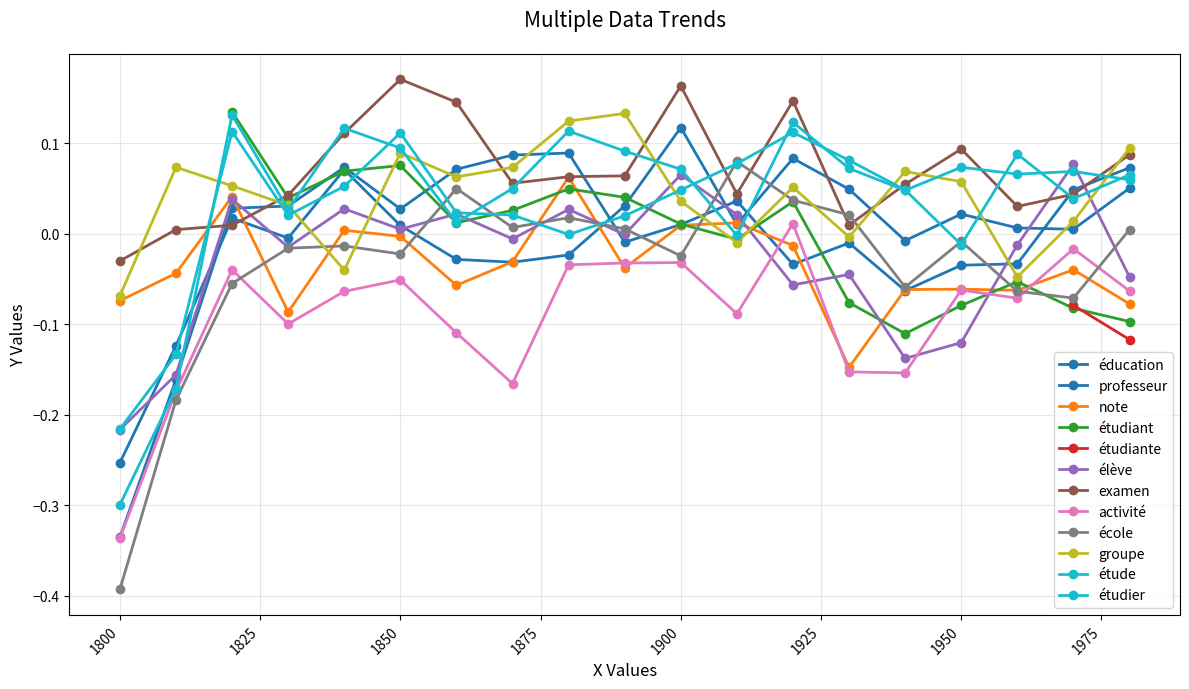

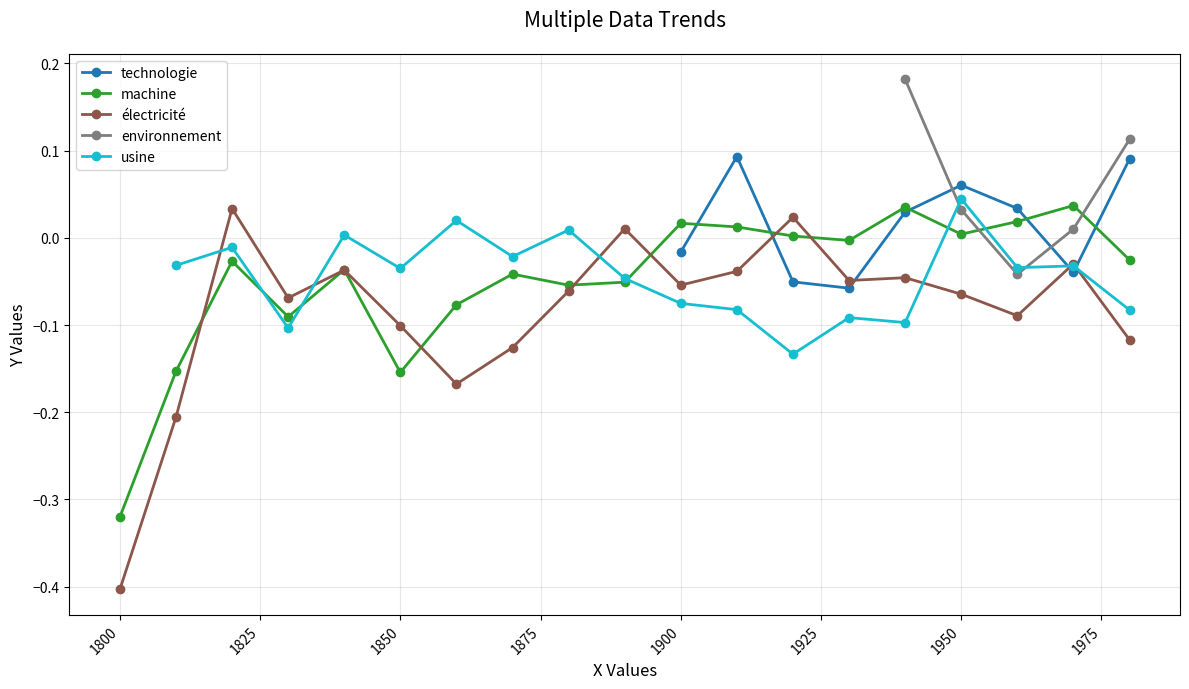

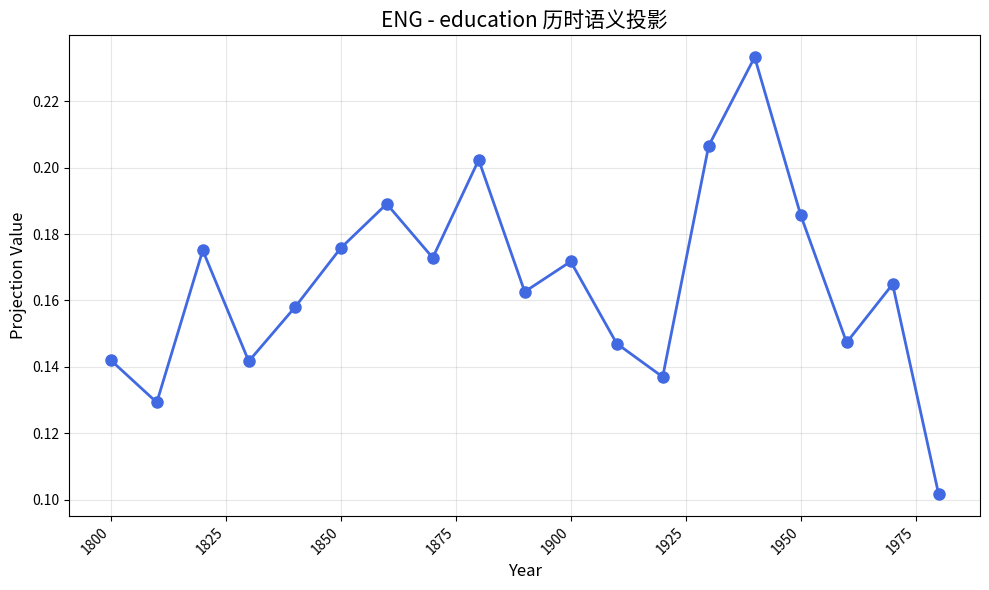

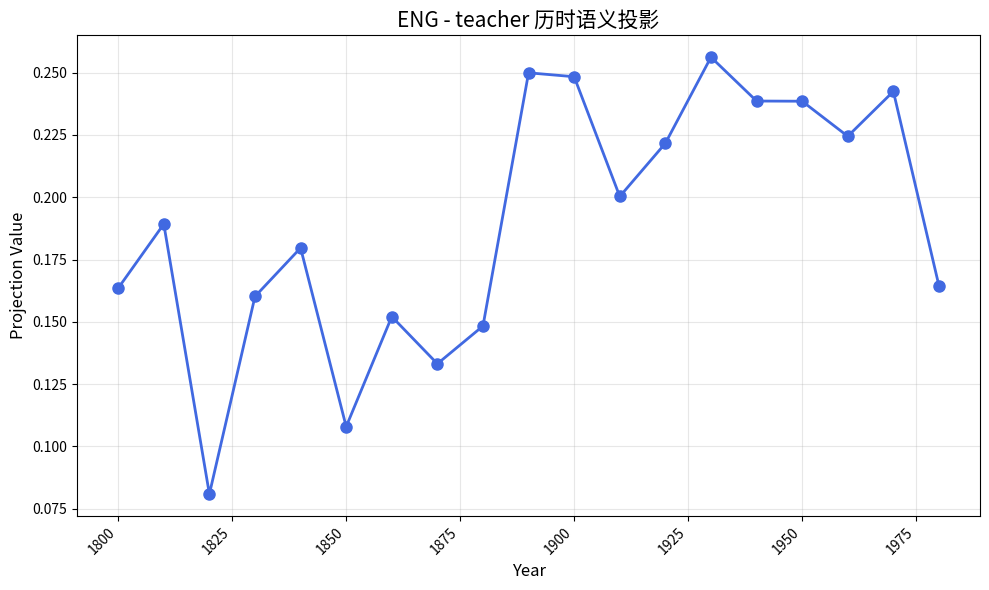

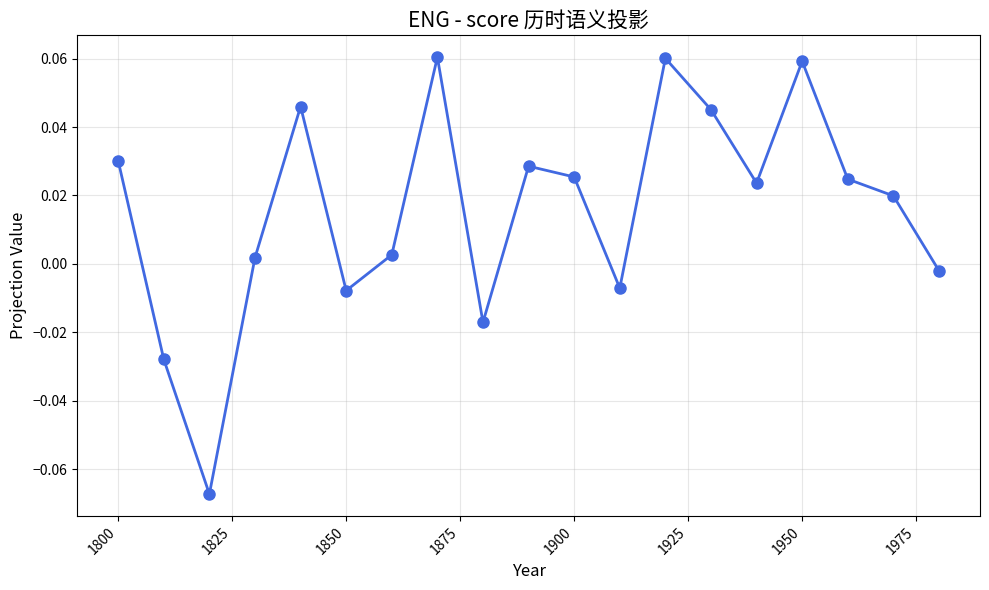

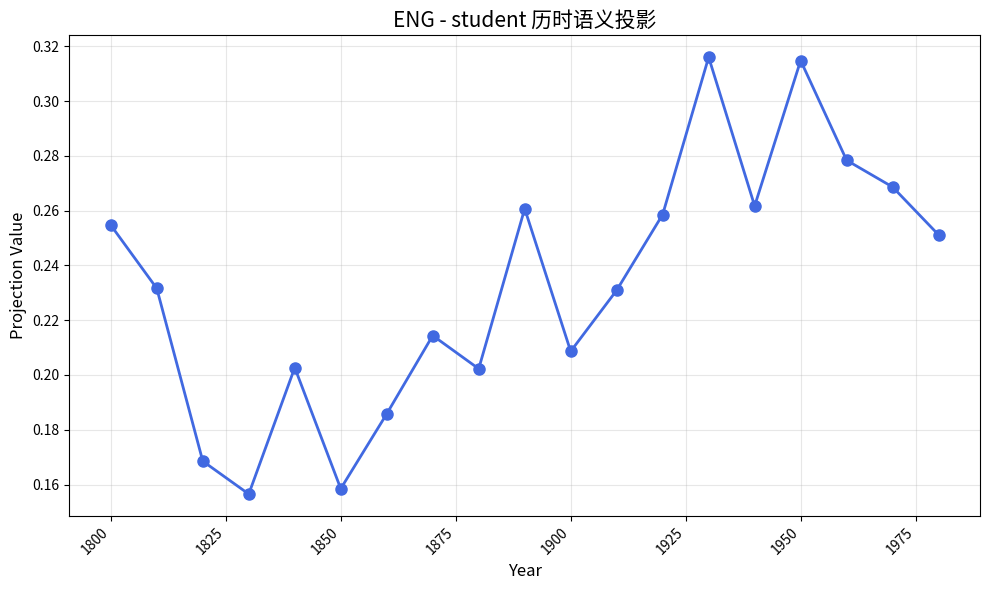

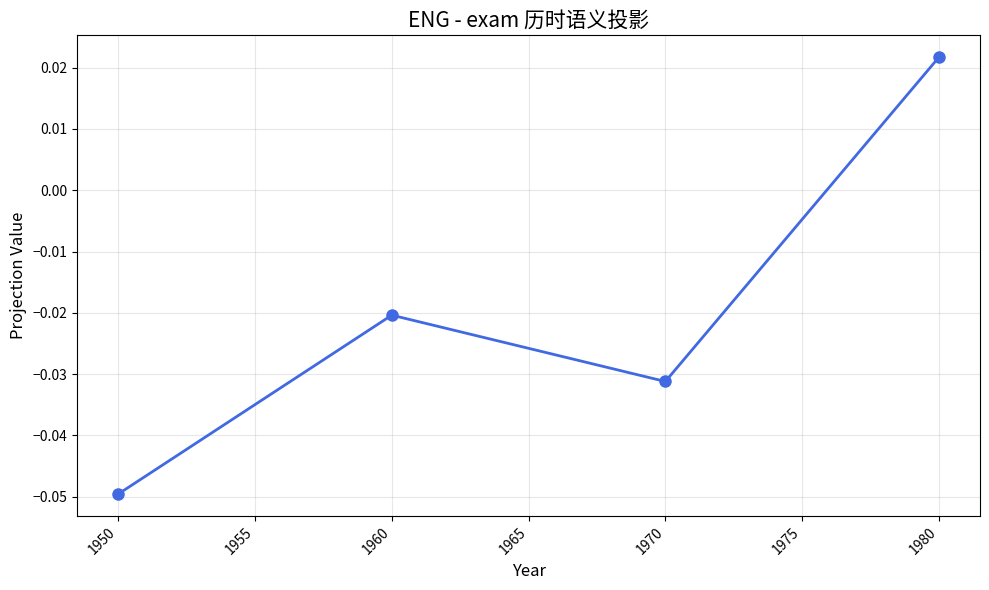

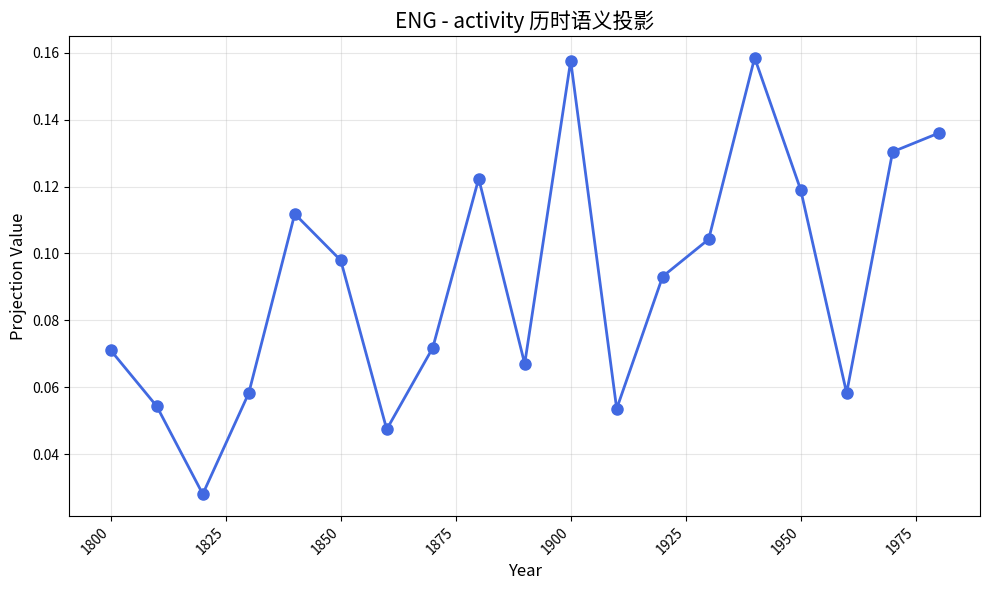

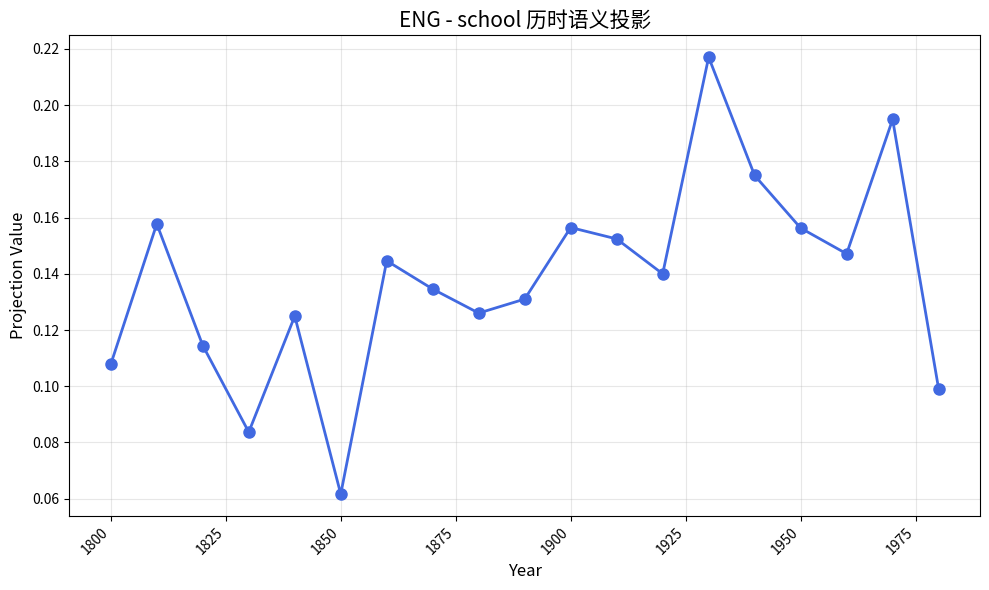

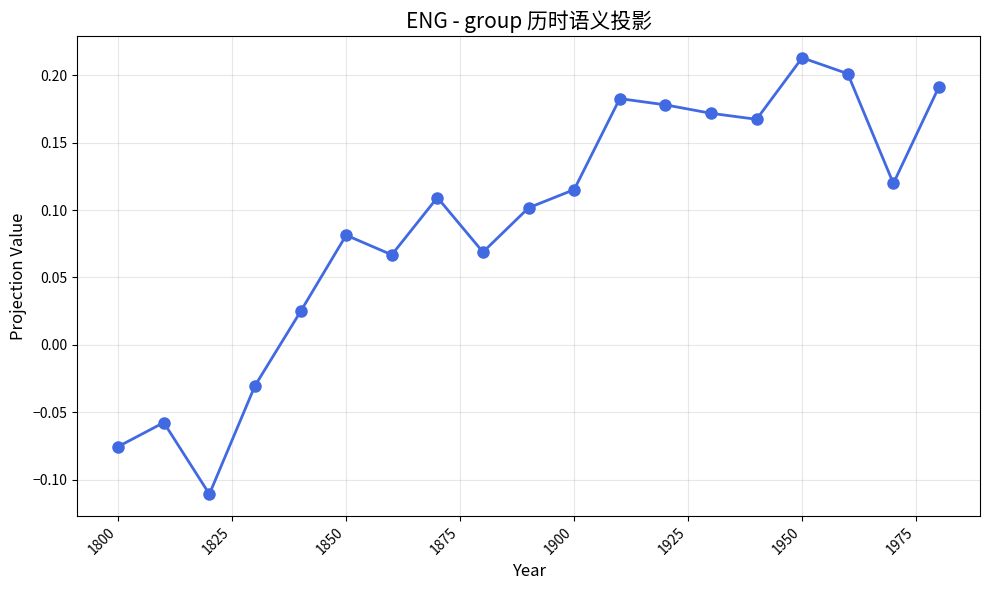

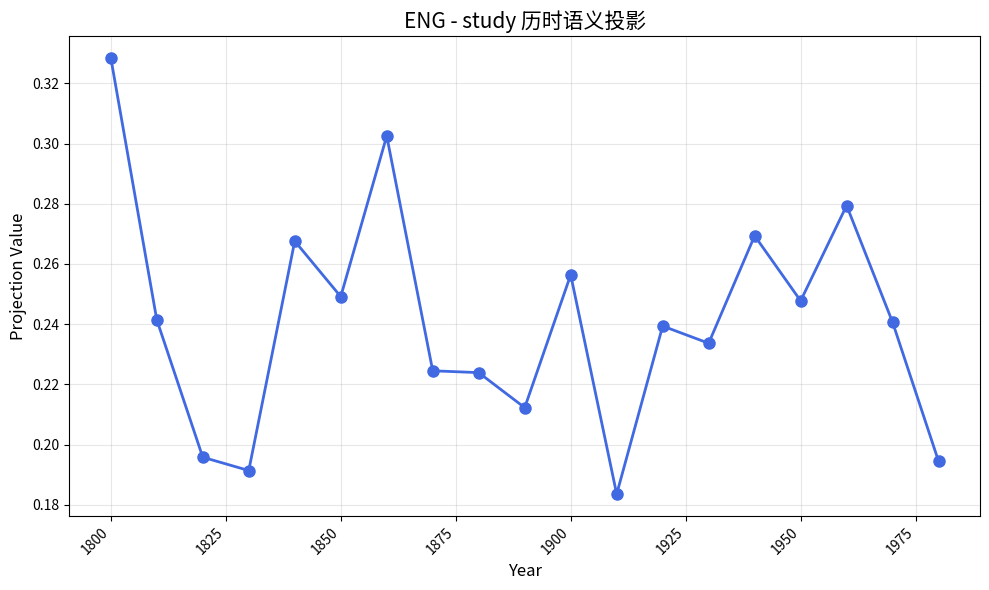

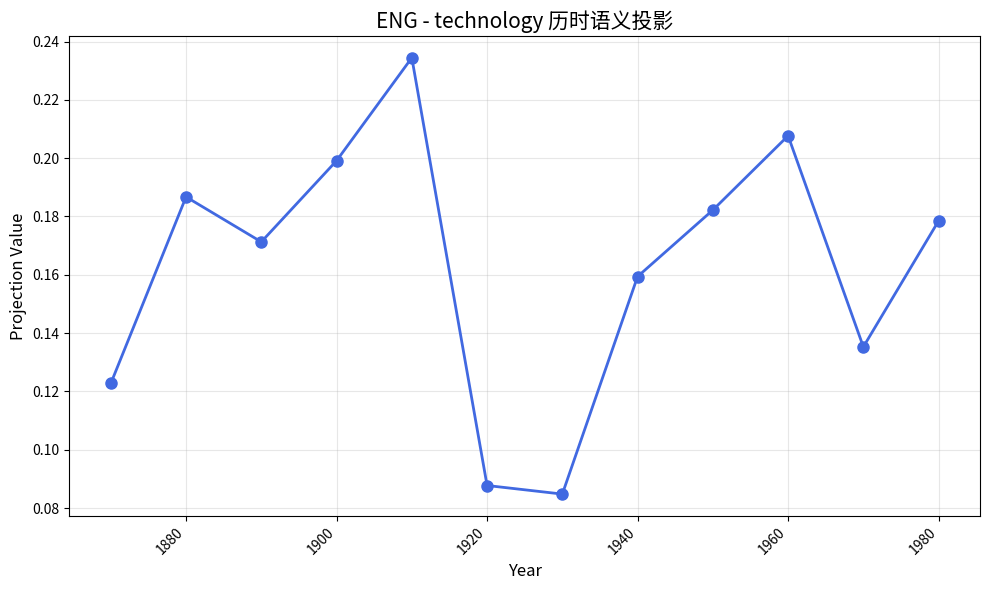

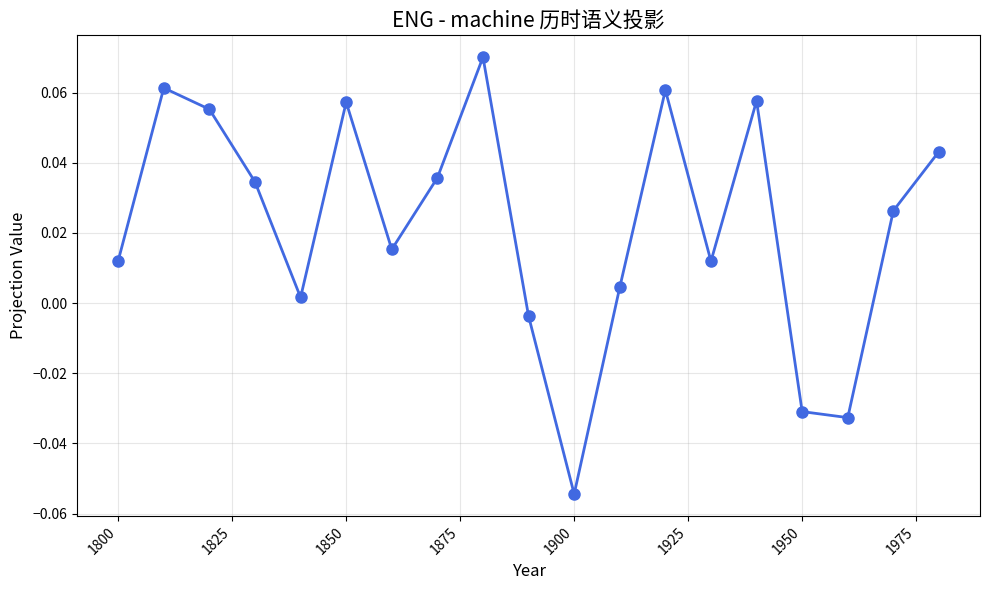

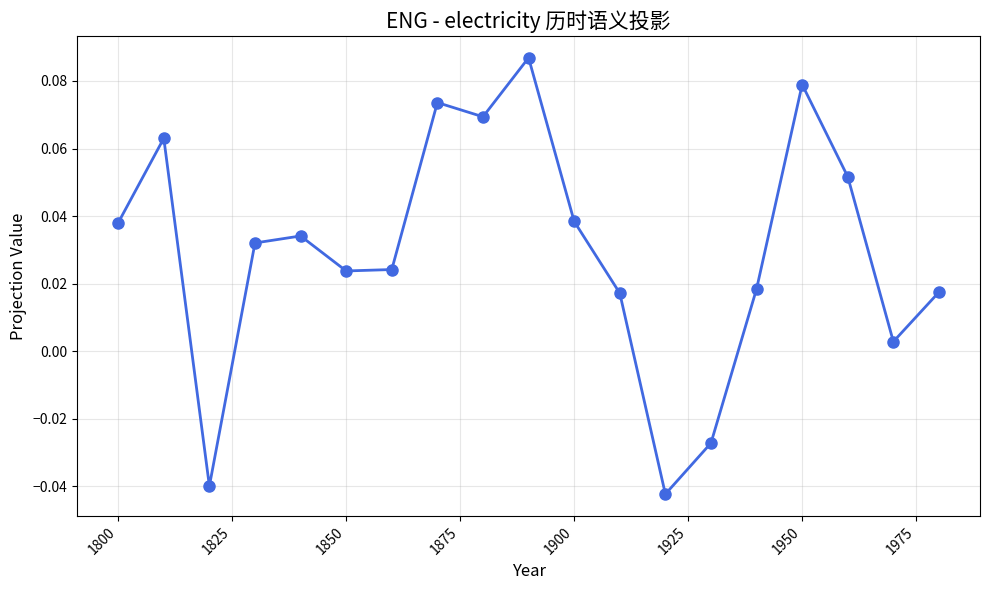

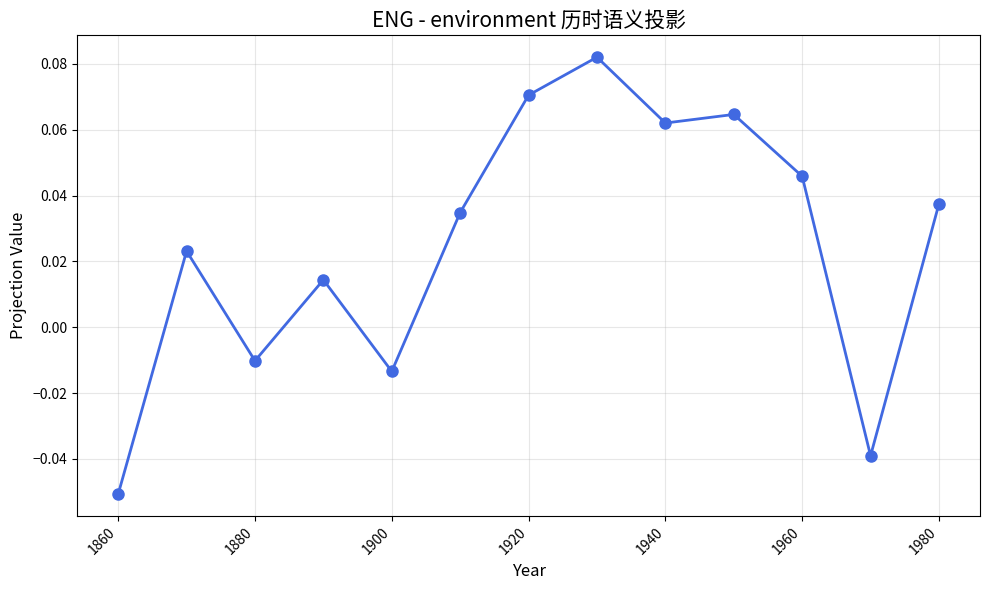

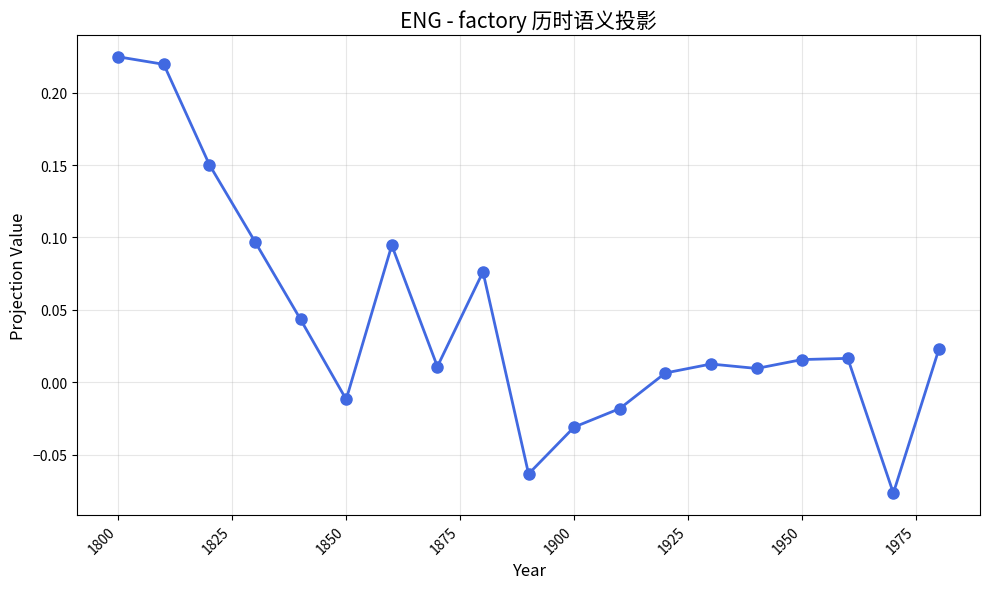

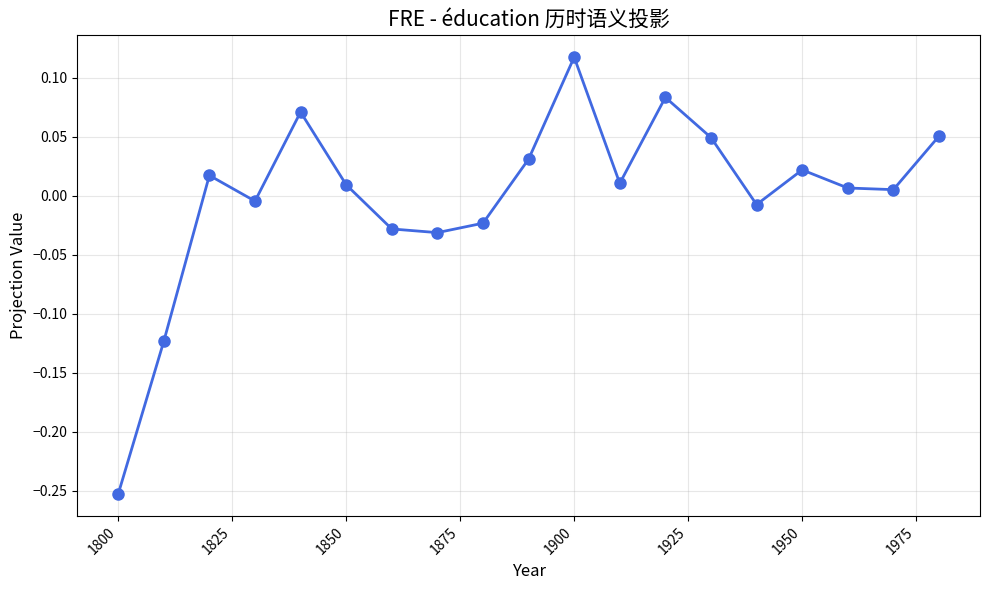

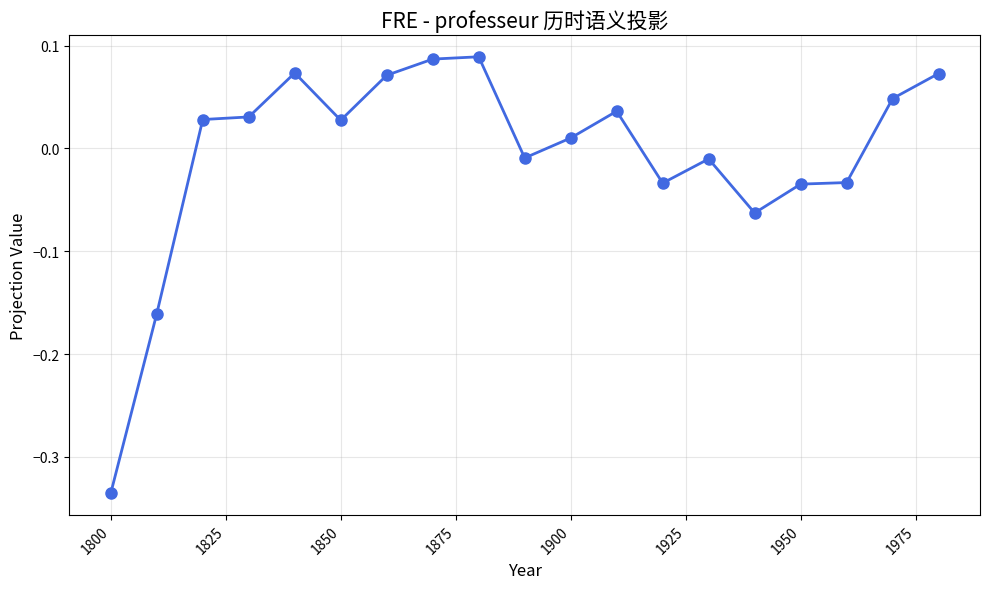

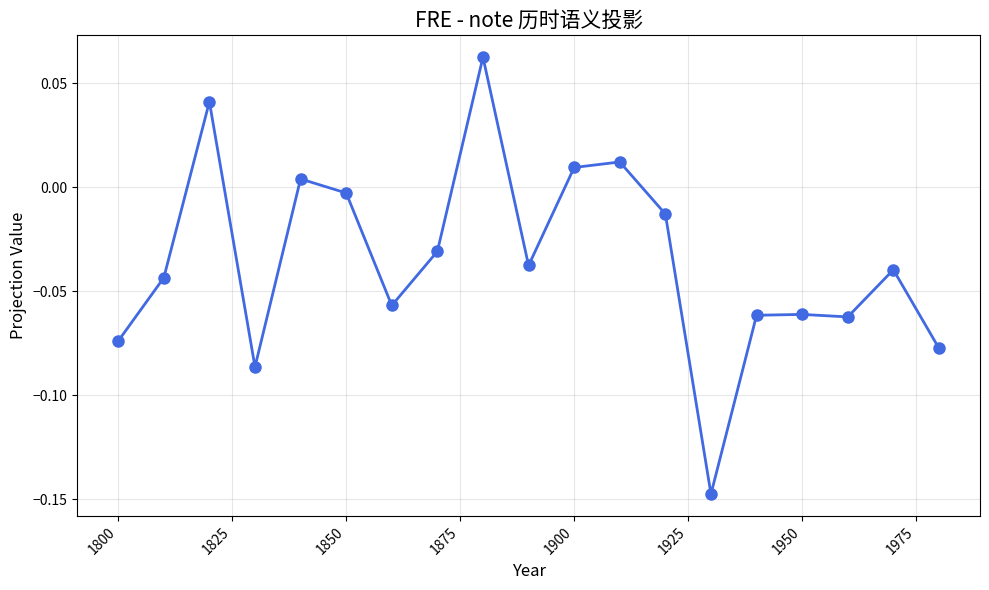

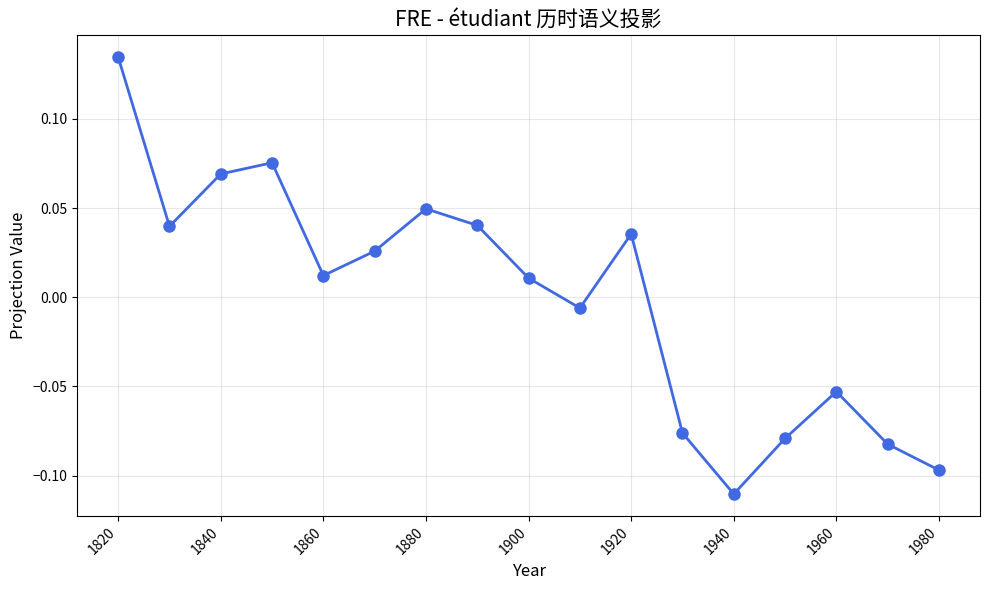

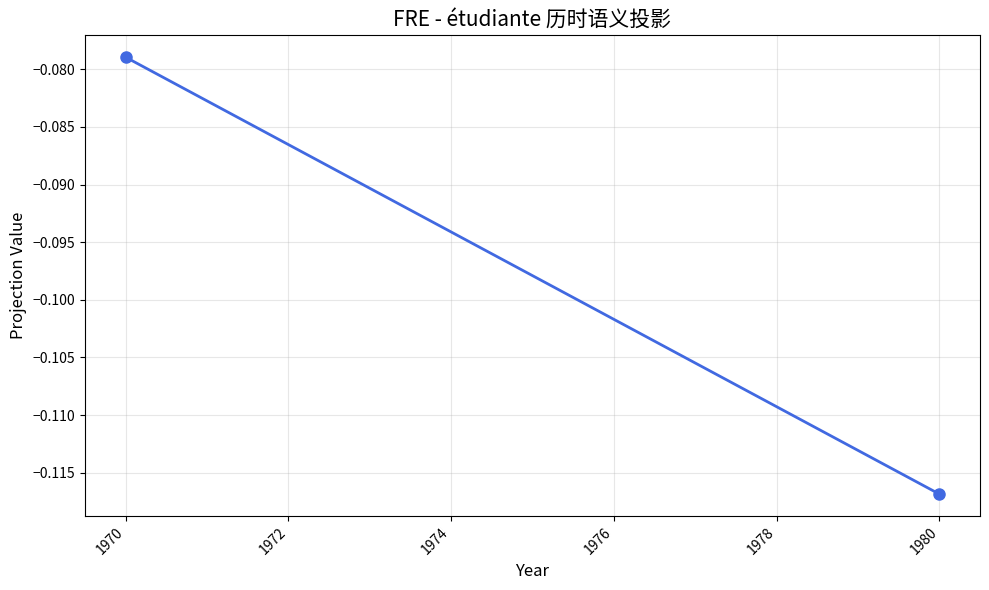

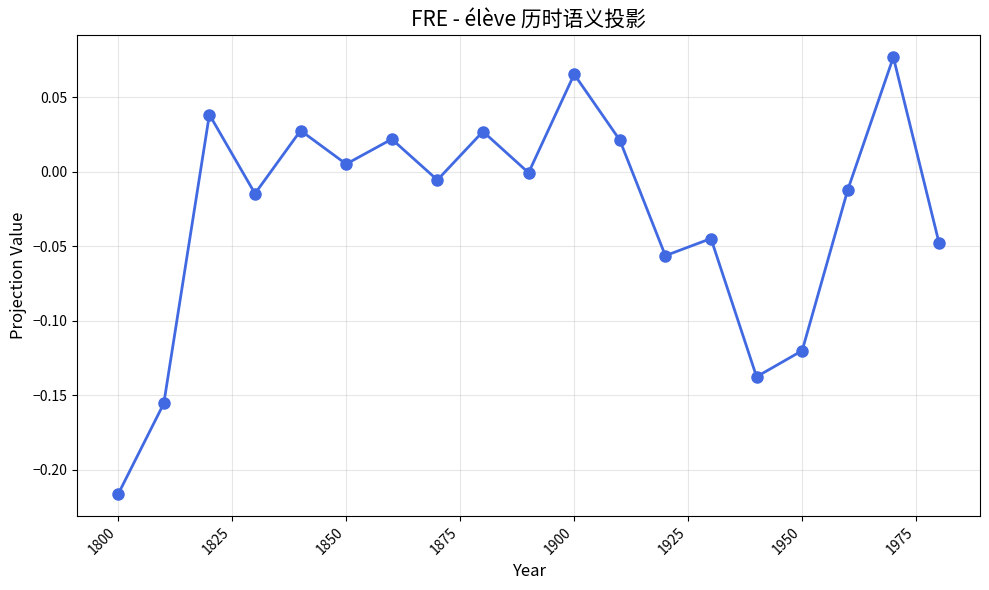

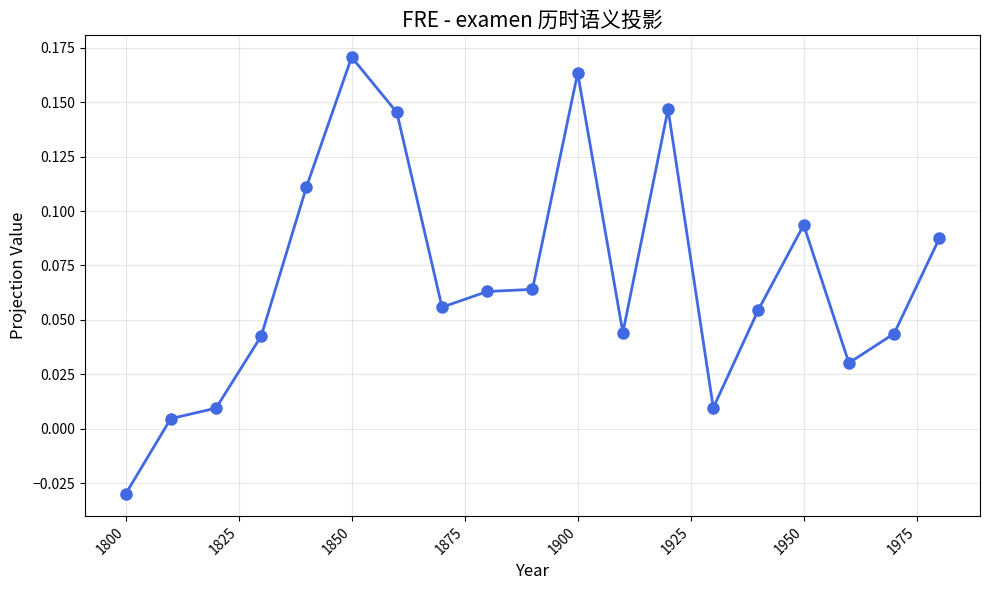

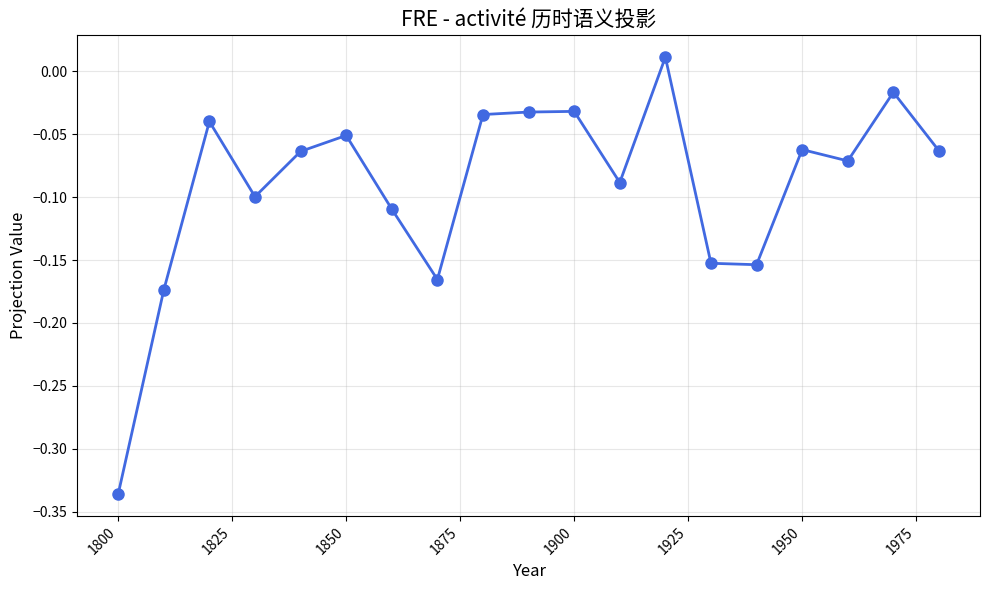

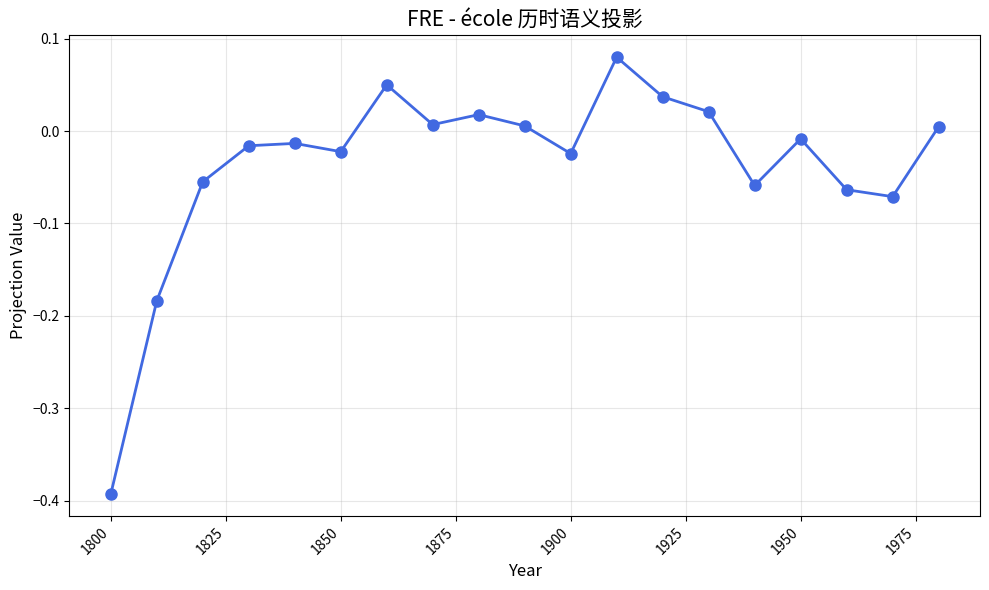

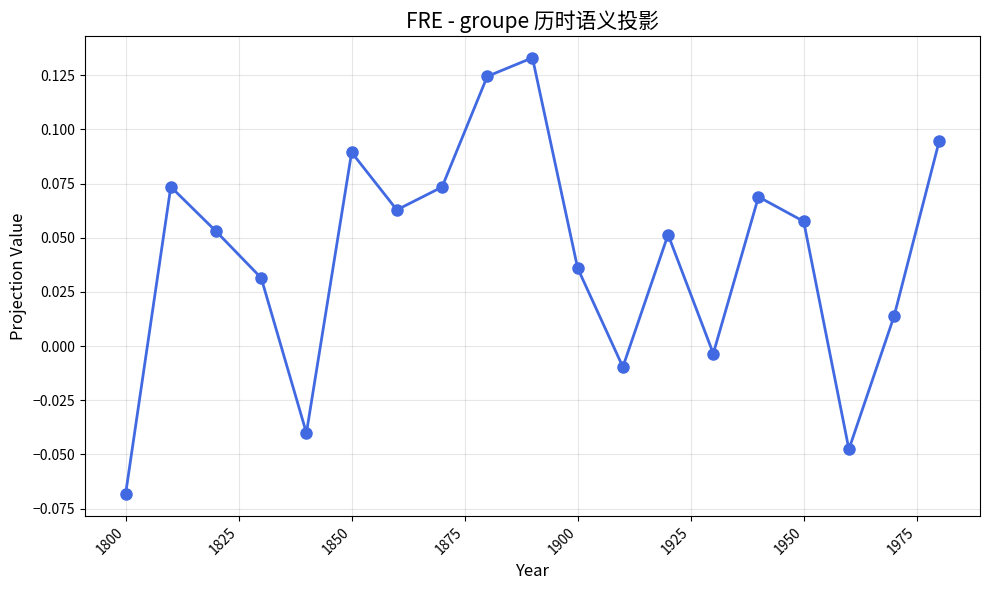

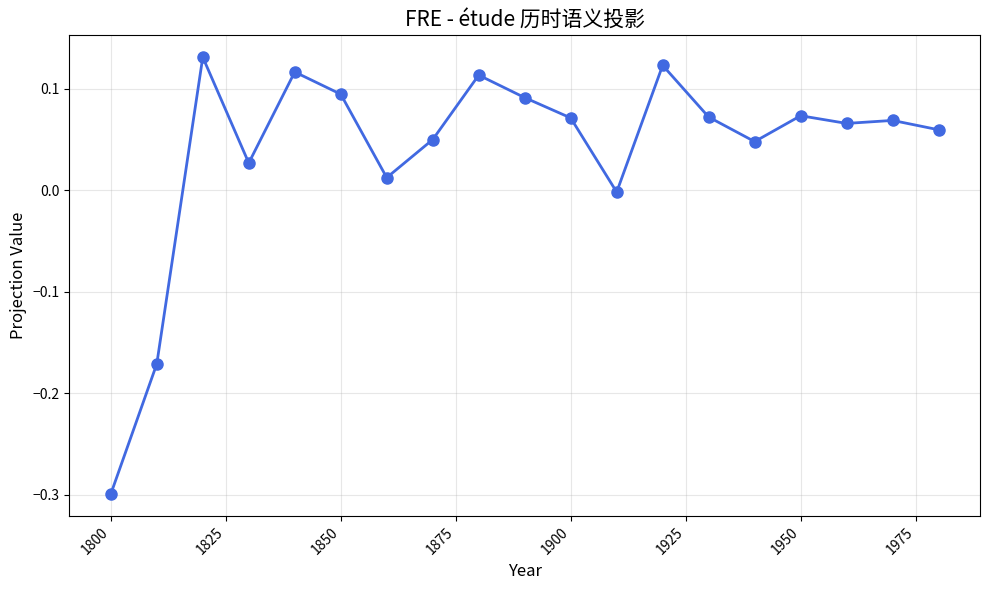

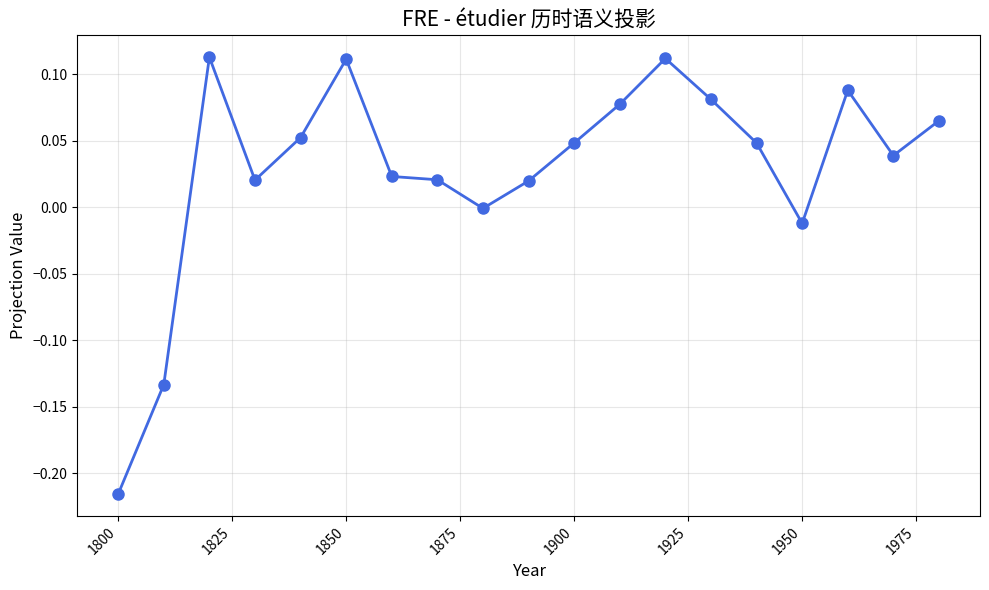

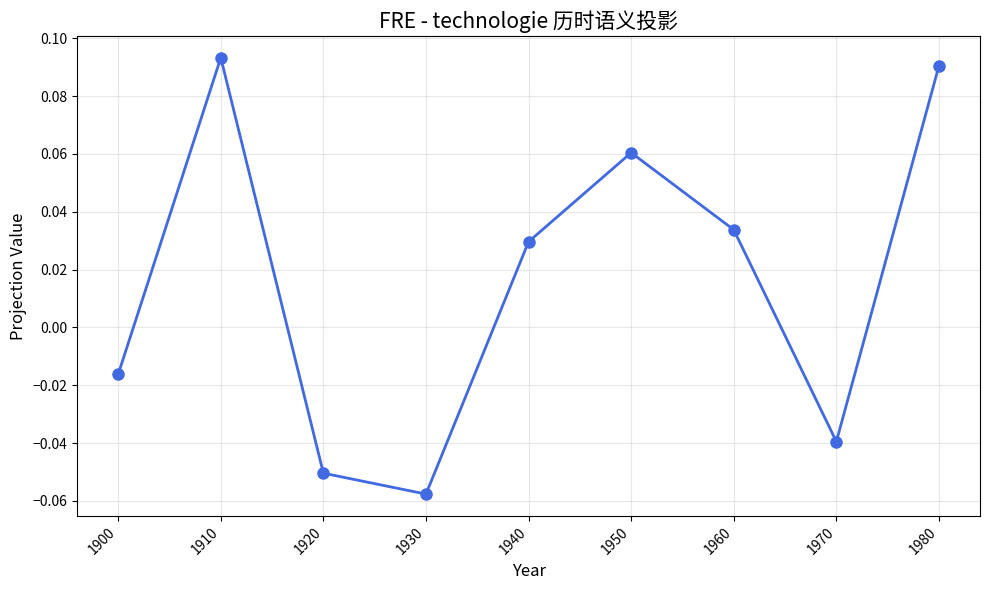

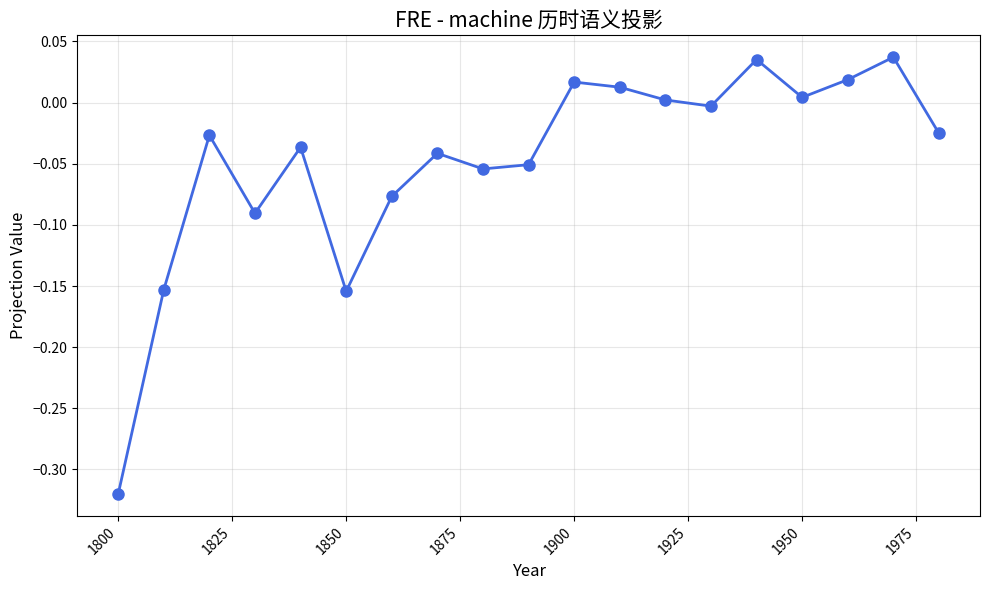

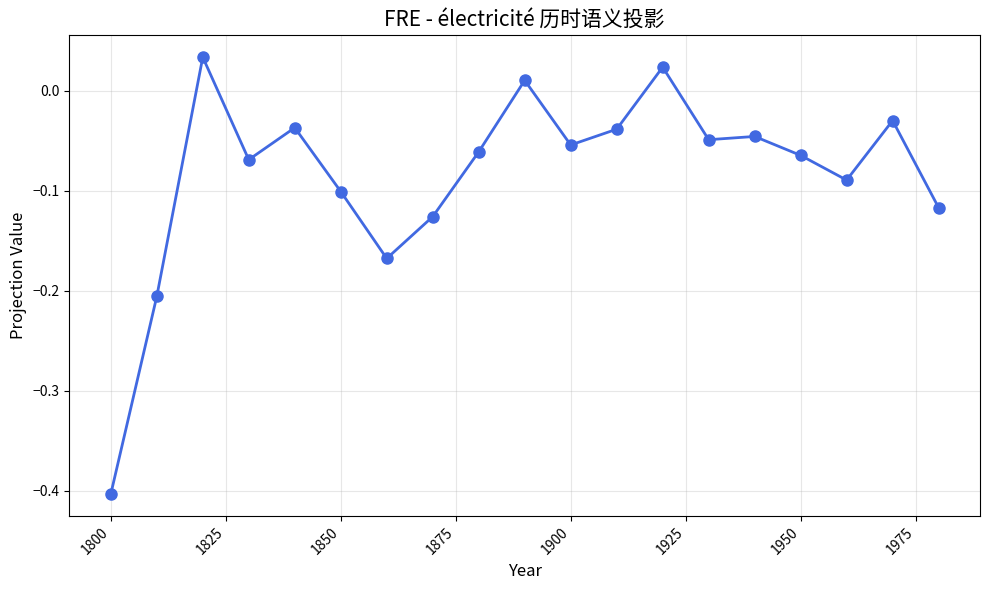

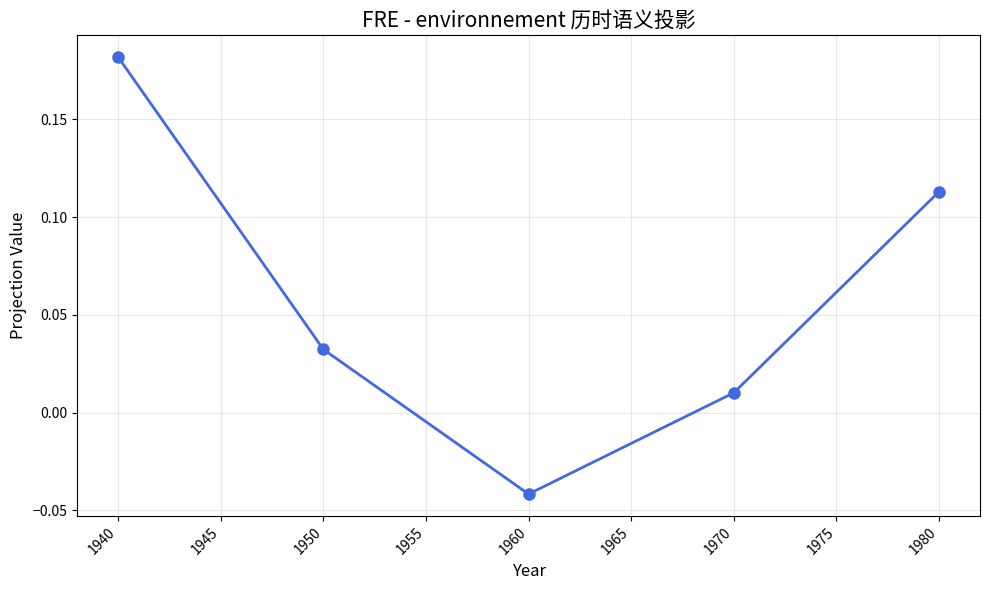

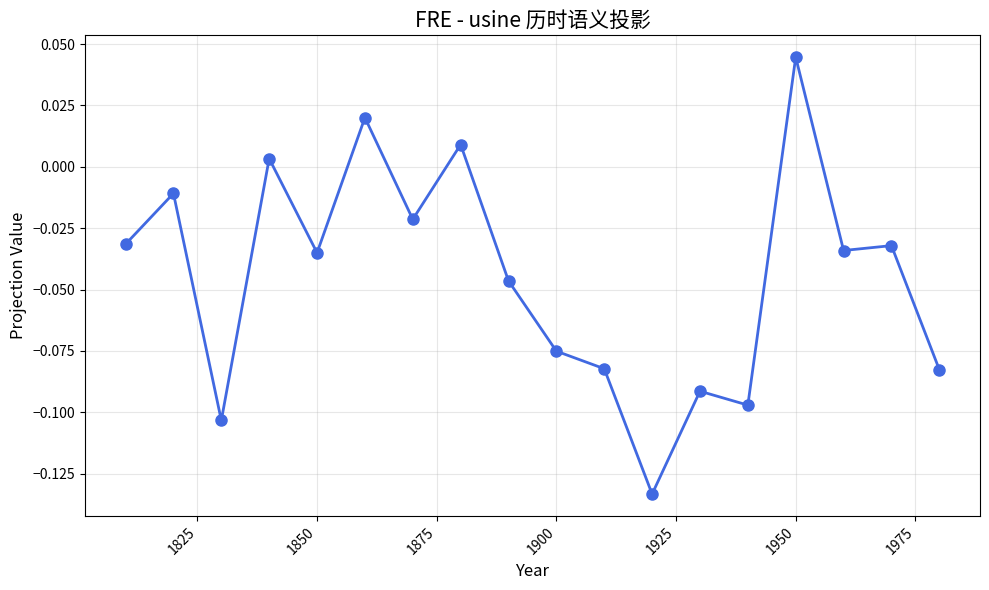

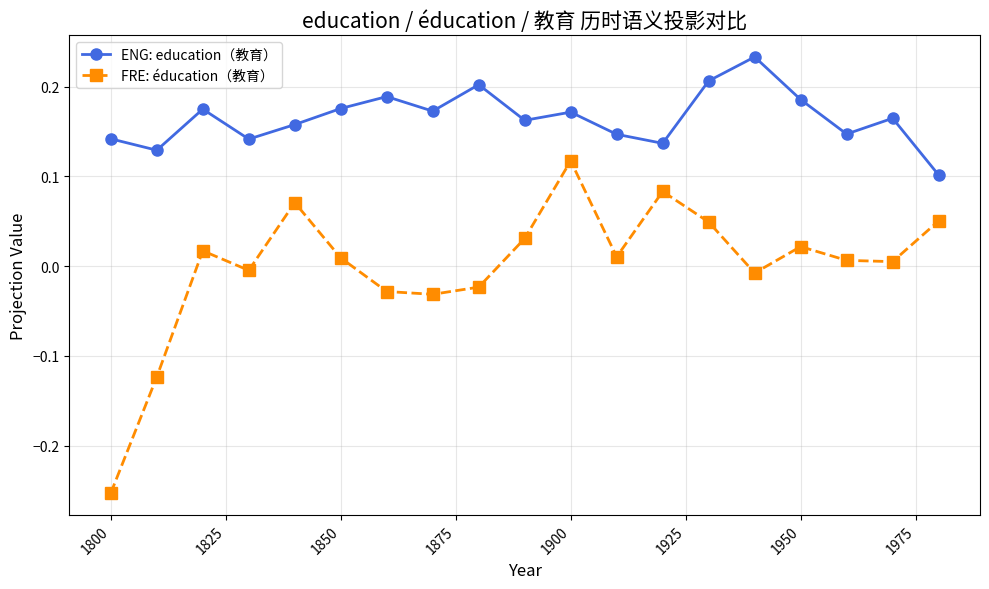

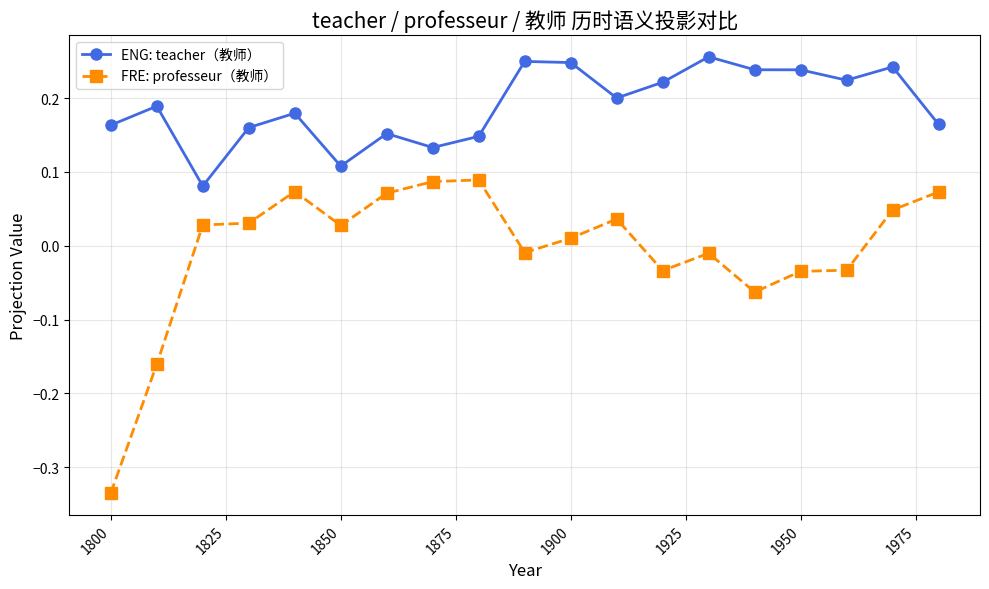

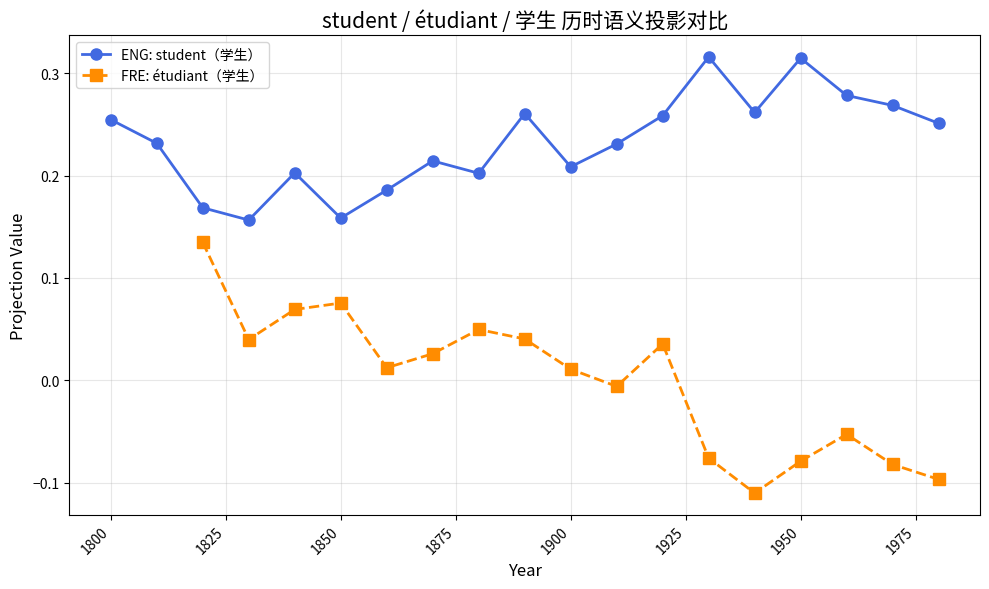

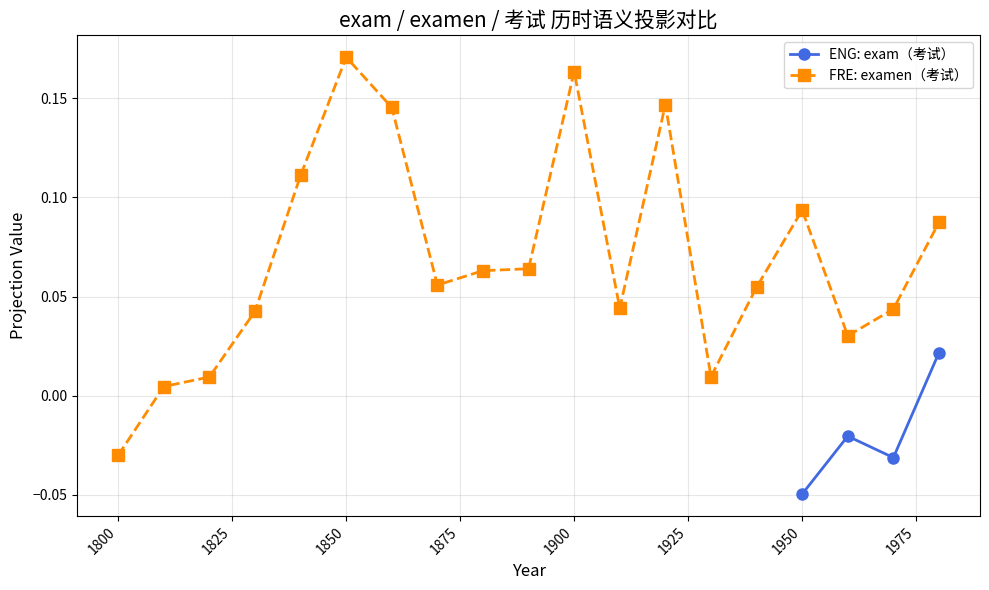

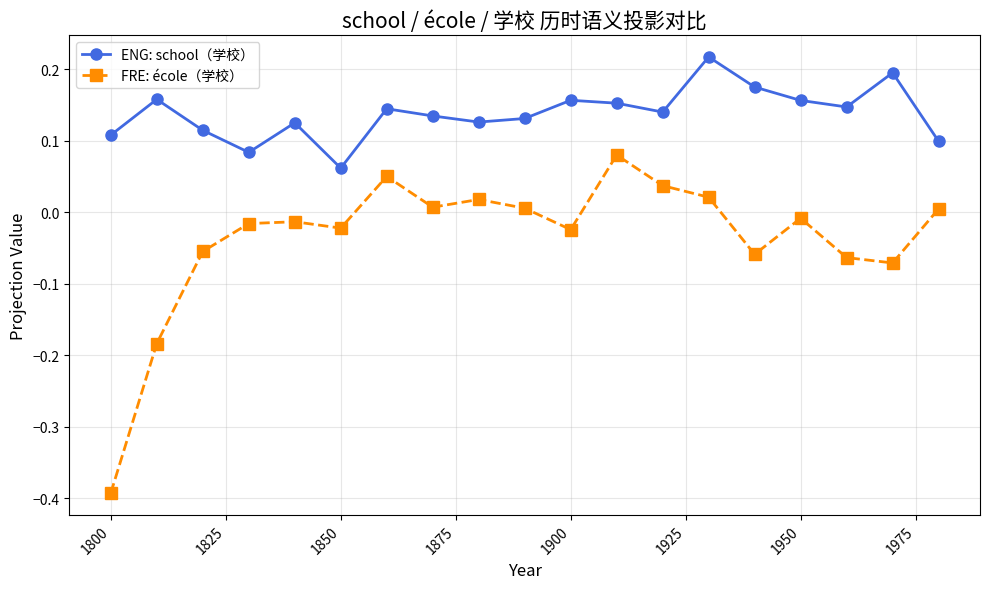

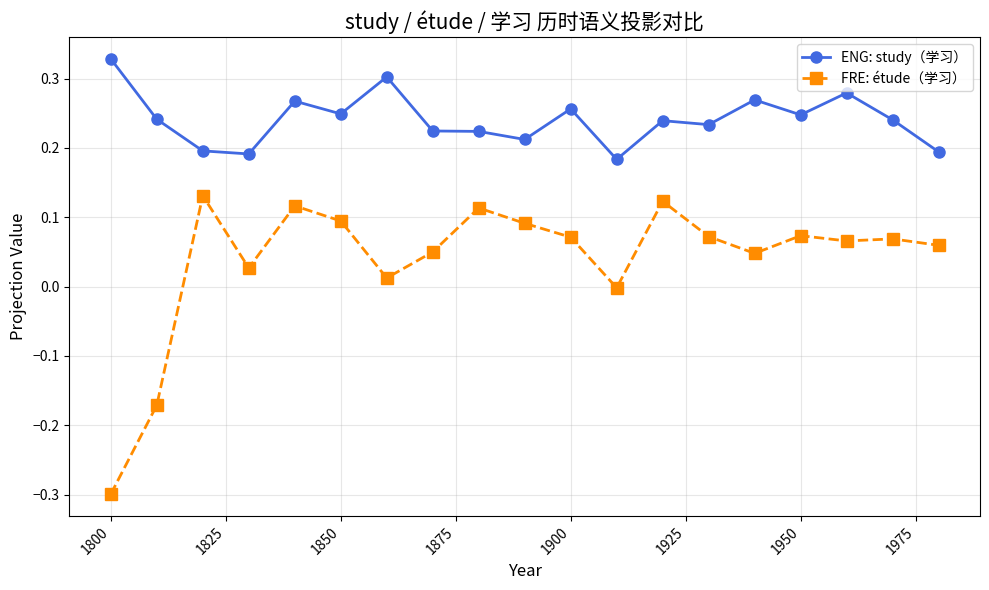

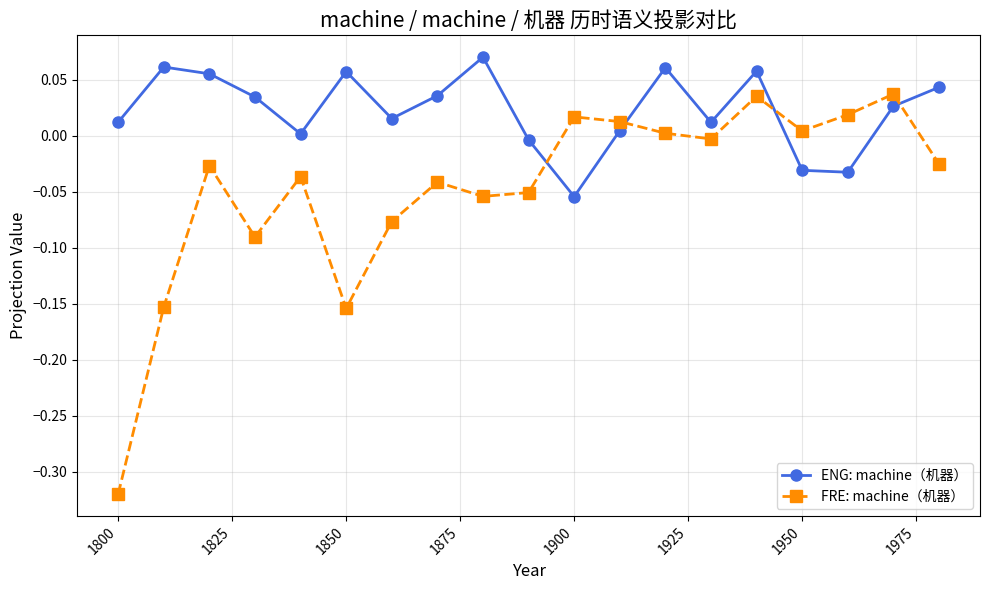

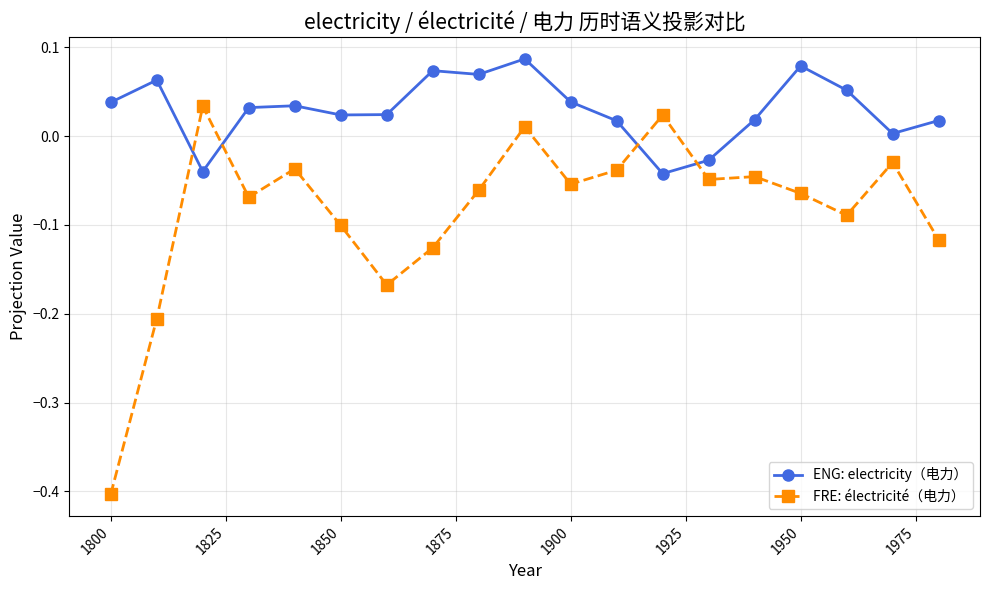

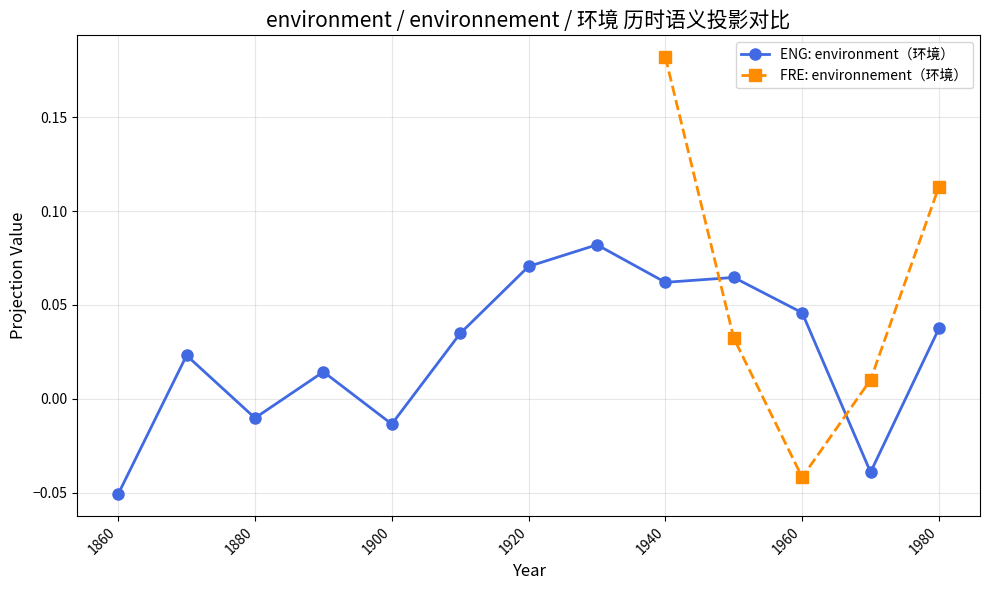

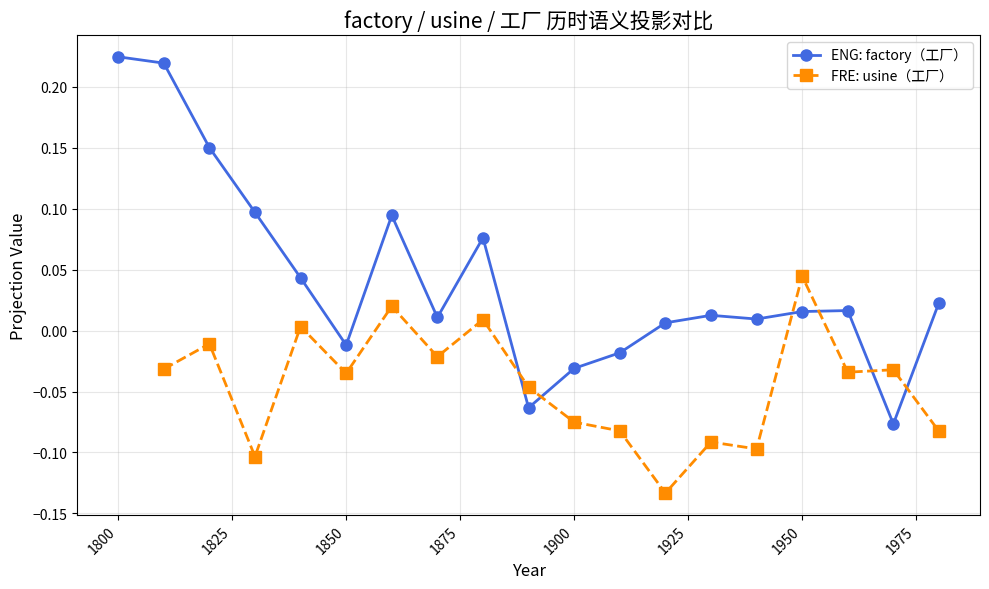

In [19]:
import zhplot
# 传入对应的词汇作为 labels
plot_multiple_ordered_dicts(results1, labels=dictionary_eng1)
plot_multiple_ordered_dicts(results2, labels=dictionary_eng2)
plot_multiple_ordered_dicts(results3, labels=dictionary_fre1)
plot_multiple_ordered_dicts(results4, labels=dictionary_fre2)

def plot_single_word_trends(results, words, lang):
    """
    分别为每个词画一张历时变化图，直接在notebook中显示。
    results: 投影结果列表（每个元素为OrderedDict）
    words: 词汇列表
    lang: 'eng' 或 'fre'
    """
    for od, word in zip(results, words):
        x = list(od.keys())
        y = list(od.values())
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'o-', color='royalblue', linewidth=2, markersize=8)
        plt.title(f"{lang.upper()} - {word} 历时语义投影", fontsize=15)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Projection Value", fontsize=12)
        plt.grid(alpha=0.3)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()  # 直接显示，不保存

# 英语单词分别画图
plot_single_word_trends(results1, dictionary_eng1, lang='eng')
plot_single_word_trends(results2, dictionary_eng2, lang='eng')

# 法语单词分别画图
plot_single_word_trends(results3, dictionary_fre1, lang='fre')
plot_single_word_trends(results4, dictionary_fre2, lang='fre')
import matplotlib.pyplot as plt

# 1. 建立英法词汇配对及中文翻译
eng_fre_pairs = [
    ('education', 'éducation', '教育'),
    ('teacher', 'professeur', '教师'),
    ('student', 'étudiant', '学生'),
    ('exam', 'examen', '考试'),
    ('school', 'école', '学校'),
    ('study', 'étude', '学习'),
    ('machine', 'machine', '机器'),
    ('electricity', 'électricité', '电力'),
    ('environment', 'environnement', '环境'),
    ('factory', 'usine', '工厂')
]

def plot_eng_fre_pairs(results_eng, words_eng, results_fre, words_fre, pairs, lang1='eng', lang2='fre'):
    """
    将英法语义相同的词汇配对，画在同一张图中对比，并加中文释义
    """
    eng_dict = dict(zip(words_eng, results_eng))
    fre_dict = dict(zip(words_fre, results_fre))
    for eng_word, fre_word, zh_word in pairs:
        if eng_word in eng_dict and fre_word in fre_dict:
            plt.figure(figsize=(10, 6))
            # 英语
            x_eng = list(eng_dict[eng_word].keys())
            y_eng = list(eng_dict[eng_word].values())
            plt.plot(x_eng, y_eng, 'o-', color='royalblue', linewidth=2, markersize=8, 
                     label=f"{lang1.upper()}: {eng_word}（{zh_word}）")
            # 法语
            x_fre = list(fre_dict[fre_word].keys())
            y_fre = list(fre_dict[fre_word].values())
            plt.plot(x_fre, y_fre, 's--', color='darkorange', linewidth=2, markersize=8, 
                     label=f"{lang2.upper()}: {fre_word}（{zh_word}）")
            plt.title(f"{eng_word} / {fre_word} / {zh_word} 历时语义投影对比", fontsize=15)
            plt.xlabel("Year", fontsize=12)
            plt.ylabel("Projection Value", fontsize=12)
            plt.grid(alpha=0.3)
            plt.xticks(rotation=45, ha='right')
            plt.legend()
            plt.tight_layout()
            plt.show()

# 教育类和科技类对比
plot_eng_fre_pairs(results1, dictionary_eng1, results3, dictionary_fre1, eng_fre_pairs, lang1='eng', lang2='fre')
plot_eng_fre_pairs(results2, dictionary_eng2, results4, dictionary_fre2, eng_fre_pairs, lang1='eng', lang2='fre')